In [22]:
import numpy as np
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [2]:
# Load Dataset
def wrangle (datafile):    

    names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

    # Load Dataset to Pandas
    df = pd.read_csv(datafile, names=names) 
    
    # Drop the Id Column 
    df.drop(columns=['id','bare_nuclei', 'mitoses'], inplace=True)
    df.replace('?',-99999, inplace=True)

    
    return df
    

In [3]:
df = wrangle("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")

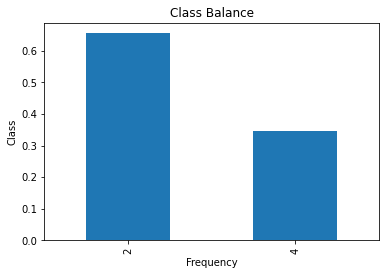

In [5]:
# Plot class balance
df["class"].value_counts(normalize=True).plot(
    kind="bar"
)
plt.xlabel("Frequency")
plt.ylabel("Class")
plt.title("Class Balance");

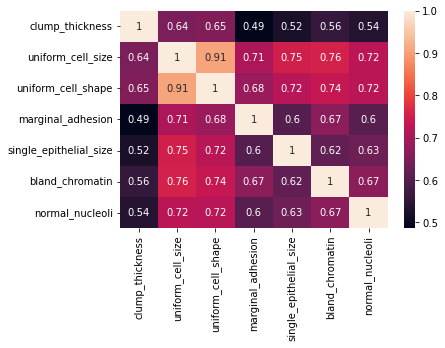

In [6]:
# Correlation Heat Map
corr = df.drop(columns="class").corr()

sns.heatmap(corr, annot=True);



In [19]:
top_ten_var = df.drop(columns="class").var().sort_values()
top_ten_var

single_epithelial_size    4.903124
bland_chromatin           5.945620
clump_thickness           7.928395
marginal_adhesion         8.153191
uniform_cell_shape        8.832265
uniform_cell_size         9.311403
normal_nucleoli           9.324680
dtype: float64

In [20]:
# Create horizontal bar chart of `top_ten_var`
fig = px.bar(
    x=top_ten_var,
    y=top_ten_var.index,
    title="SCF: High Variance Features"
)
fig.update_layout(xaxis_title="Variance", yaxis_title="Feature" )

fig.show()

In [7]:
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


In [8]:
target = "class"

X = df.drop(columns=[target])
y = df[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:

# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC (kernel="linear", random_state=32)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
  
    kfold = KFold(n_splits=10)   
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.962370 (0.029441)
SVM: 0.960617 (0.032776)


KNN
0.9428571428571428
              precision    recall  f1-score   support

           2       0.98      0.94      0.96        97
           4       0.87      0.95      0.91        43

    accuracy                           0.94       140
   macro avg       0.93      0.95      0.93       140
weighted avg       0.95      0.94      0.94       140

KNN
KNeighborsClassifier()


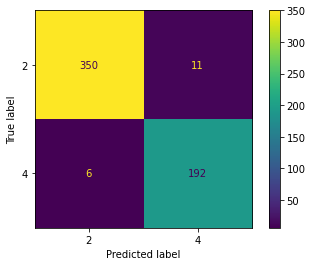

SVM
0.9642857142857143
              precision    recall  f1-score   support

           2       0.98      0.97      0.97        97
           4       0.93      0.95      0.94        43

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

SVM
SVC(kernel='linear', random_state=32)


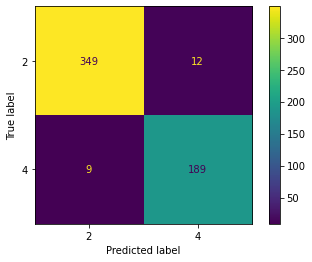

In [12]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    
    print(name)
    print(model)
    cm = confusion_matrix(y_train, model.predict(X_train))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 

In [29]:
# Instantiate transformer
pca = PCA(n_components=2, random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns=["PC1","PC2"])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (699, 2)


,PC1,PC2
0,-3.664722,-1.732130
1,2.312002,0.447297
2,-4.329330,-0.014909
3,5.687823,-1.542823
4,-3.265446,0.009329


In [31]:
fig = px.scatter(
    X_pca,
    x="PC1",
    y="PC2",
    color=y.astype(str),
    title="PCA Representation of Clusters"
)
fig.update_layout(xaxis_title="PC1", yaxis_title="PC2")
fig.show()